# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

import warnings
warnings.filterwarnings('ignore')

## 0. Parameters <a name="parameters"></a>

In [9]:
#кол-во классов (выходных нейронов)
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [10]:
#стандартный датасет из keras, 50000 картинок 32х32 пикселя 3 канала цвета(RGB), 10 классов
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 120s 1us/step
(50000, 32, 32, 3)
(50000, 1)


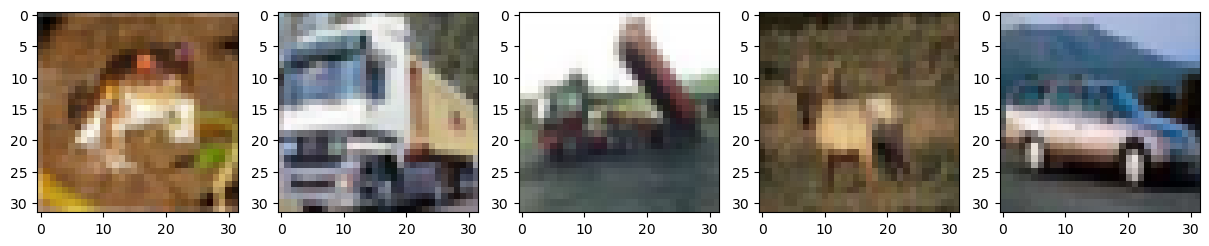

In [33]:
#посмотрим на примеры изображений
fig = plt.figure(figsize=(15, 3))

ax = fig.add_subplot(1, 5, 1)
ax.imshow(x_train[0])
ax = fig.add_subplot(1, 5, 2)
ax.imshow(x_train[1])
ax = fig.add_subplot(1, 5, 3)
ax.imshow(x_train[2])
ax = fig.add_subplot(1, 5, 4)
ax.imshow(x_train[3])
ax = fig.add_subplot(1, 5, 5)
ax.imshow(x_train[4]);

In [34]:
#масшатабируем данные, чтобы все пикселы были от 0 до 1 
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

#превращяем целочисленные метки классов в вектора, т.к модель оценивает вероятность каждого класса
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)
print(y_train.shape)

(50000, 10)


## 2. Build the model <a name="build"></a>

Можно было бы использовать последовательную модель (Sequential), где слой идёт за слоем. Такая схема удобная, но не гибкая. Поэтому будем сразу использовать API keras для более гибкой настройки слоев.

Пример Sequential:

* model = models.Sequential([
*   layers.Flatten(input_shape=(32, 32, 3)),
*    layesr.Dense(200, activation = 'relu'),
*    layers.Dense(150, activation = 'relu'),
*    layers.Dense(10, activation = 'softmax')
* ])

In [38]:
#входной слой, указываем размерность картинки
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer) #Flatten превращает многомерный массив в плоский вектор
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

#выходной слой, кол-во нейронов = кол-ву классов, активация softmax - многомерная сигмойда
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

#отчёт, кол-во параметров в слое = размерность * кол-во нейронов + смещения
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Train the model <a name="train"></a>

In [39]:
#определяем оптимизатор и компилируем модель
opt = optimizers.Adam(learning_rate=0.0005)

#categorical_crossentropy - перекрестная энтропия для мультиклассификации
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [41]:
#batch_size - кол-во наблюдений которе передается на каждом шаге обучения
#epochs - сколько раз сеть прогонит через себя все данные
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True);

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7144 - accuracy: 0.3863
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6207 - accuracy: 0.4220
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5549 - accuracy: 0.4458
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5119 - accuracy: 0.4613
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4728 - accuracy: 0.4749
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4433 - accuracy: 0.4855
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4202 - accuracy: 0.4908
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3943 - accuracy: 0.5028
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3720 - accuracy: 0.5127
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.352

## 4. Evaluation <a name="evaluate"></a>

In [42]:
#оценка модели на тестовых данных
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4573 - accuracy: 0.4843


[1.4573335647583008, 0.48429998755455017]

In [43]:
#наши классы
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

# массив с предиктами для классов
preds = model.predict(x_test)
#тут берем максимальную вероятность из всех классов 
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 1ms/step


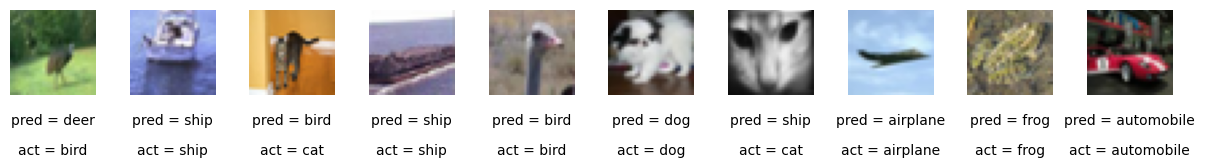

In [44]:
#визуализируем данные с их предсказаниями
n_to_show = 10
#берем 10 случайный картинок
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

# 5. CNN

добавим в модель слои свертки, нормализации и dropout-регуляризации

In [48]:
input_layer = layers.Input((32, 32, 3))

#свертка, 32 фильтра, ядро 3x3, шаг 1
#нормализация
#активация
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#свертка, 32 фильтра, ядро 3x3, шаг 2 (выходная картинка в два раза меньше)
#нормализация
#активация
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#свертка, 64 фильтра, ядро 3x3, шаг 1
#нормализация
#активация
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#свертка, 64 фильтра, ядро 3x3, шаг 2
#нормализация
#активация
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#вытигаем в плоский вектор
x = layers.Flatten()(x)

#полносвязный слой с 128 нейронами
#нормализация
#активация
#регуляризация, удаляем половину нейронов
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer);

#кол-во параметров в слое свертки: (размерность ядра * кол-во каналов в картинке)*кол-во фильтров + смещения на каждый фильтр
#пример: (3*3*3)*32+32=896
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_16 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                         

In [49]:
#компилируем
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

#обучаем
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
);

Epoch 1/10
1563/1563 [==============================] - 34s 20ms/step - loss: 1.5433 - accuracy: 0.4551 - val_loss: 1.2144 - val_accuracy: 0.5645
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1746 - accuracy: 0.5834 - val_loss: 1.0632 - val_accuracy: 0.6219
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0118 - accuracy: 0.6465 - val_loss: 1.0254 - val_accuracy: 0.6362
Epoch 4/10
1563/1563 [==============================] - 30s 20ms/step - loss: 0.9210 - accuracy: 0.6768 - val_loss: 1.0142 - val_accuracy: 0.6438
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8579 - accuracy: 0.7002 - val_loss: 0.8321 - val_accuracy: 0.7099
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8051 - accuracy: 0.7181 - val_loss: 0.8795 - val_accuracy: 0.6959
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7583 - accuracy: 0.7335 - val_loss: 1.3055 -

In [50]:
#смотрим как выросло качество
model.evaluate(x_test, y_test, batch_size=1000);

10/10 [==============================] - 1s 128ms/step - loss: 0.7850 - accuracy: 0.7350


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91321aab-aa91-4889-8ef1-9edef354e364' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>